In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [17]:
df = pd.read_csv('Fraud_Data.csv', parse_dates = ['signup_time', 'purchase_time'])
ip = pd.read_csv('IpAddress_to_Country.csv')

In [18]:
ip['lower_bound_ip_address'] = ip.lower_bound_ip_address.astype(int)

In [21]:
df['ip_address'] = df.ip_address.astype(int)

In [32]:
df['class'].value_counts()/len(df['class'])

0    0.906354
1    0.093646
Name: class, dtype: float64

In [44]:
df['delta'] = (df.signup_time - df.purchase_time).dt.seconds

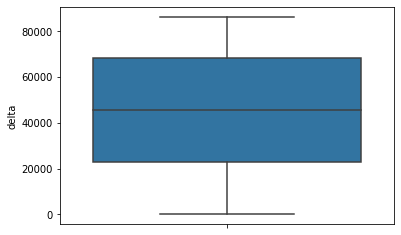

In [46]:
sns.boxplot(y = 'delta', data = df)

In [55]:
df.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'delta'],
      dtype='object')

In [ ]:
for i in df.columns[3:]:
    sns.scatterplot(x = i, y = 'class', data =df)

In [58]:
df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,delta
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,72518
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,68456
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,-2147483648,1,86399
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,-2147483648,0,26315
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,44939
...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,-2147483648,1,9167
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,-2147483648,0,19130
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,-2147483648,0,57584
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,-2147483648,0,37881


In [ ]:
sns.factorplot(x = 'delta' , y= 'class' ,data = df,ci = None, join = False)

C:\Users\tashi\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


In [62]:
ip_data=df.iloc[:,9]

k=[]
for i in range(len(ip_data)):
    ip1=ip_data[i]
    tmp=ip[(ip['lower_bound_ip_address']<=ip1) & (ip['upper_bound_ip_address']>=ip1)]['country'].tolist()
k.extend(tmp if tmp else ['NULL'])


In [65]:
len(k)

101810